## Cardiac Patients— Markers and Trends

#### PUBH 1142: Intro to Health Data Science  
#### Professor Juan Klopper  
#### Nareg Panossian

Cardiovascular diseases like heart disease, heart attacks, and strokes are the leading cause of deaths globally and in the United States. These disease not only cause hundreds of thousands of deaths in the US each year, but also cost the US hundreds of billions of dollars in medical costs and lost productivity. Moreover, as the population continues to age, non-communicable diseases like heart disease are becoming even more of a burden. 

In the past few decades, significant strides have been made in surgical, pharmaceutical, and other methods of treatment and evaluation for cardiovascular disease. There are several factors that can help physicians and public health professionals diagnose and/or understand an individual's risk for cardiovascular disease. Age, sex, cholesterol levels, heart rates, electrocardiogram results, blood pressure, and other markers are typically collected and used when analyzing cardiovascular issues. 

>Source: https://www.cdc.gov/heartdisease/facts.htm

In this notebook, we will explore sample demographic and lab result data from real cardiac patients. The data is taken from the "heart.csv" dataset, which is publically available on Kaggle. Understanding the relationships between the variables in this dataset can provide insight into the prediction, diagnosis, and risks for cardiac conditions like heart disease.

To get started, we will import the libraries that we need for data analysis as well as the heart.csv dataset.

In [4]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# importing the dataset as df
df = pd.read_csv('https://raw.githubusercontent.com/naregp/PUBH1142/main/heart.csv')

Next, we will take a look at the first 5 rows of the dataset to understand its characteristics and see the variables that we are dealing with.

In [4]:
# show the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


For the sake of readability, we will rename the variables to be more clear. The variables (with  renames noted) are as follows:

<span style="color:red;">age </span>: the age of the patients

<span style="color:red;">sex </span>: the sex of the patients

cp -> <span style="color:red;">chest_pain_type </span>: the type of chest pain

trestbps -> <span style="color:red;">resting_blood_pressure </span>: the resting blood pressure of the patient

chol -> <span style="color:red;">cholesterol </span>: serum cholesterol

fbs -> <span style="color:red;">fasting_blood_sugar </span>: fasting blood sugar > 120 mg/dl

resecg -> <span style="color:red;">resting_electrocardiogram </span>: resting electrocradiographic results

thalach -> <span style="color:red;">max_heart_rate_achieved </span>: maximum heart rate achieved

exang -> <span style="color:red;">exercise_induced_angina </span>: exercise induced angina

oldpeak -> <span style="color:red;">st_depression </span>: ST depression induced by exercise relative to rest

slope -> <span style="color:red;">st_slope </span>: slope of the peak exercise ST segment

ca -> <span style="color:red;">num_major_vessels </span>: number of major vessels colored by fluroscopy

thal -> <span style="color:red;">thalassemia </span>: thalium stress test result

In [6]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

Here are the first five rows with the updated names:

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


It will be useful to get summary statistics, like the average, of each of the variables. Here is a summary:

In [13]:
# show summary statistics for each variable
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>* The average age of the patients is 54
>* The average resting blood pressure is 131.61
>* The average cholesterol level is 246
>* The average maximum heart rate achieved is 149.11

Here is a breakdown of the distributions of some of the numerical variables side by side:

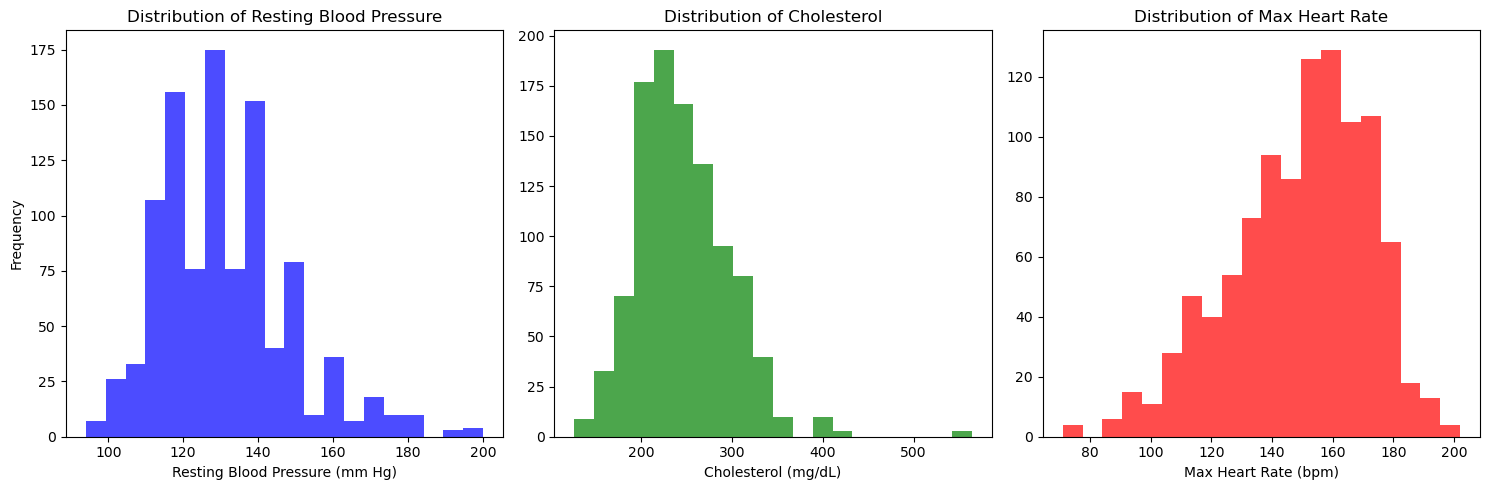

In [67]:
plt.figure(figsize=(15, 5))

# Histogram of Resting Blood Pressure
plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
plt.hist(df['resting_blood_pressure'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

# Histogram of Cholesterol
plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
plt.hist(df['cholesterol'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol (mg/dL)')

# Histogram of Max Heart Rate
plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
plt.hist(df['max_heart_rate_achieved'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate (bpm)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Clearly, the distributions are similar, suggesting some potential relationships. We can start comparing the different variables visually in order to get a deeper understanding of these potential relationships.

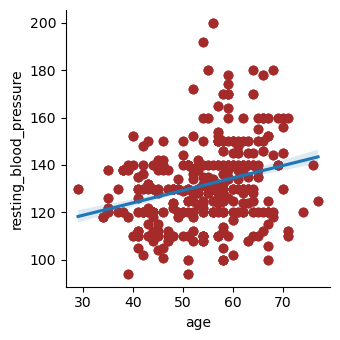

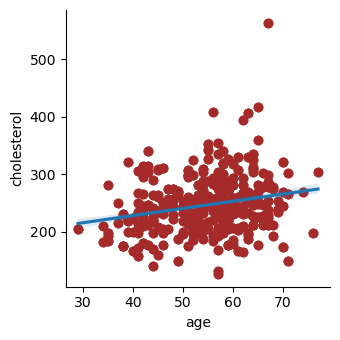

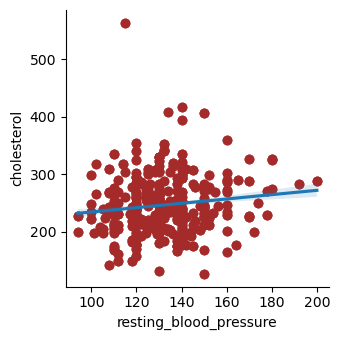

In [46]:
# make a graph comparing age on the x-axis and resting blood pressure on the y-axis and add a line of best fit. 
sns.lmplot(x='age', y='resting_blood_pressure', data=df, height=3.5, aspect=1, scatter_kws={'color':'brown'})

# make a graph comparing age on the x-axis and cholesterol on the y-axis and add a line of best fit.
sns.lmplot(x='age', y='cholesterol', data=df, height=3.5, aspect=1, scatter_kws={'color':'brown'})

# make a graph comparing resting blood pressure on the x-axis and cholesterol on the y-axis and add a line of best fit.
sns.lmplot(x='resting_blood_pressure', y='cholesterol', data=df, height=3.5, aspect=1, scatter_kws={'color':'brown'})

The first two graphs suggest that age has a strong correlation with resting blood pressure and cholesterol levels. Logically, resting blood pressure and cholesterol are themselves correlated, as seen in the third graph. This makes intuitive sense, because increased age is a risk factor for heart problems, so the numerical variables increase together. I decided to continue exploring the factor of age and how it is correlated with the other variables. In the next few graphs, we will expand on this by showing how exercise ability also decreases with age. (Note: a higher st depression indicates heart problems)

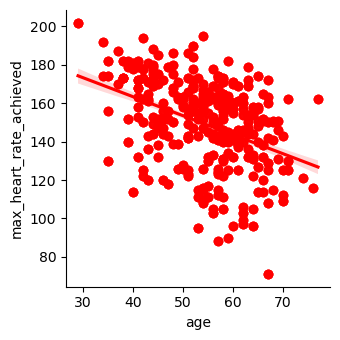

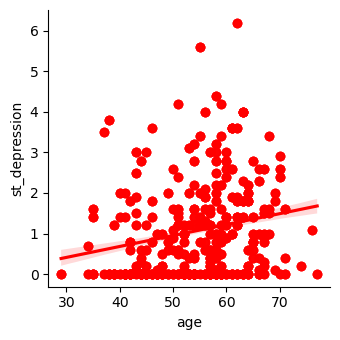

In [32]:
# make a graph comparing age on the x-axis and max heart rate achieved on the y-axis and add a line of best fit. make the points red
sns.lmplot(x='age', y='max_heart_rate_achieved', data=df, height=3.5, aspect=1, line_kws={'color': 'red'}, scatter_kws={'color': 'red'})

# make a graph comparing age on the x-axis and st depression on the y-axis and add a line of best fit. make the points red
sns.lmplot(x='age', y='st_depression', data=df, height=3.5, aspect=1, line_kws={'color': 'red'}, scatter_kws={'color': 'red'})

Here is a complete overview of comparisons between the numerical variables in the dataset. The correlations with age are reproduced.

/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcor

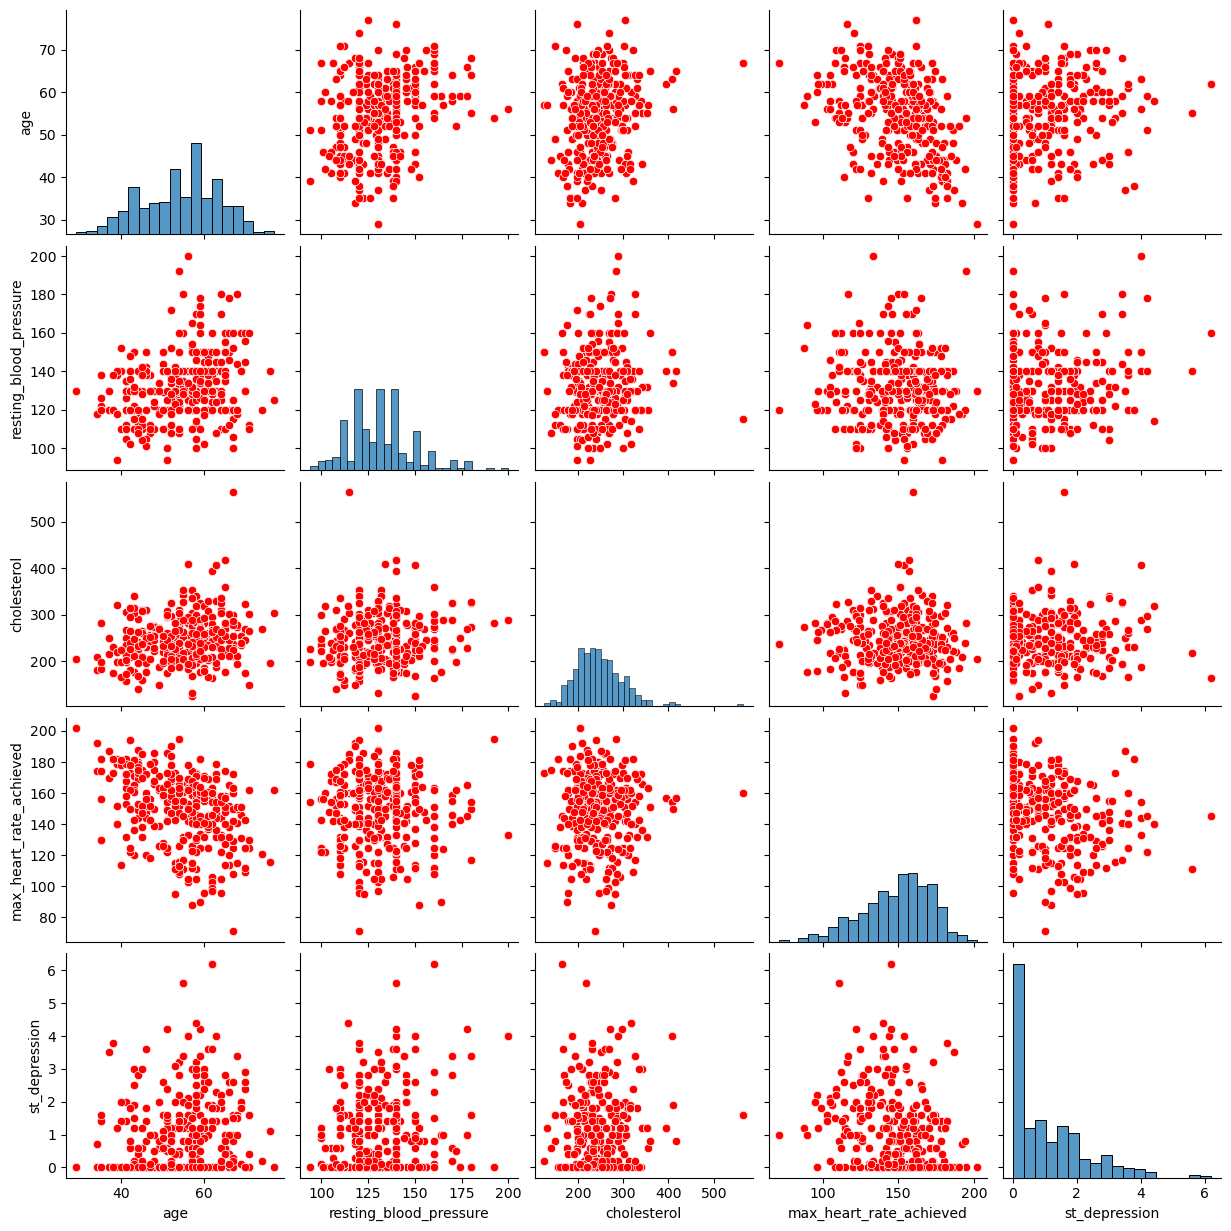

In [68]:
# make a pairplot of the variables age, resting blood pressure, cholesterol, max heart rate achieved, and st depression. make the points red
sns.pairplot(df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']], plot_kws={'color': 'red'})

I wanted to test if this strong correlation with age held true for some of the non-numerical variables. Interestingly, the type of chest pain patients reported and fasting blood sugar results did not seem to vary much accross age ranges. This could indicate a true lack of correlation, or have to do with the way the creators of the dataset chose patients. Unfortunately, there is not much information available about this process.

/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


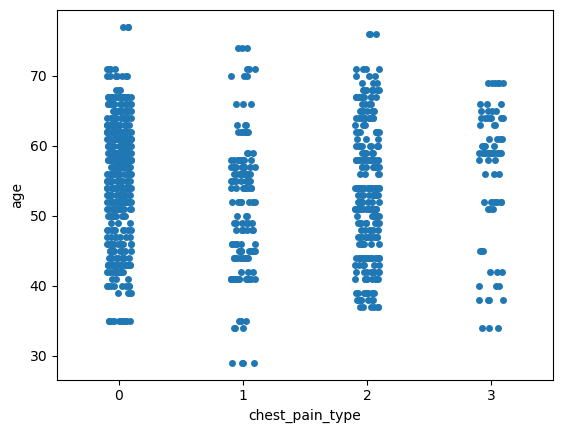

/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naregpanossian/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


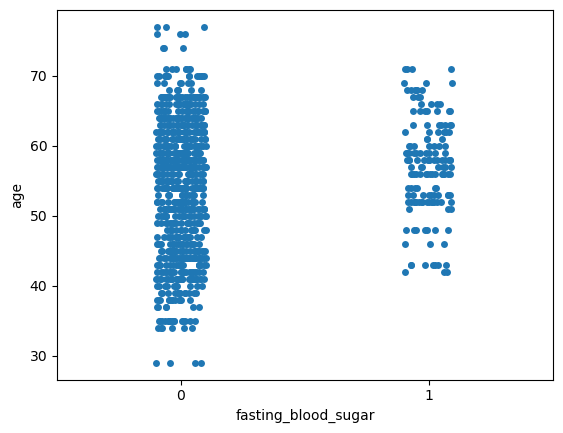

In [65]:
#create a strip plot with chest pain type on the x-axis and age on the y-axis
sns.stripplot(x='chest_pain_type', y='age', data=df)
plt.show()

#create a strip plot with fasting blood sugar on the x-axis and age on the y-axis
sns.stripplot(x='fasting_blood_sugar', y='age', data=df)
plt.show()